Iris Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


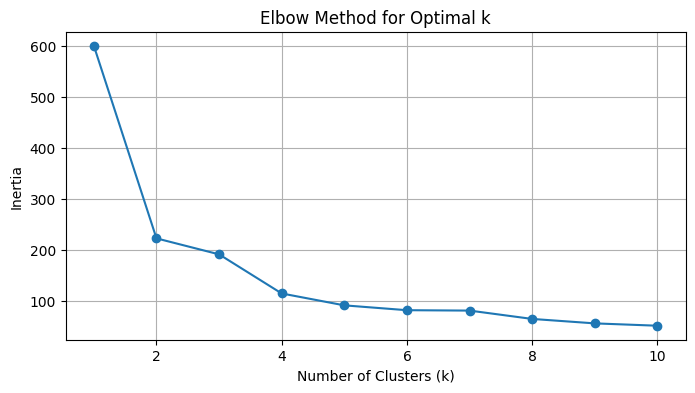

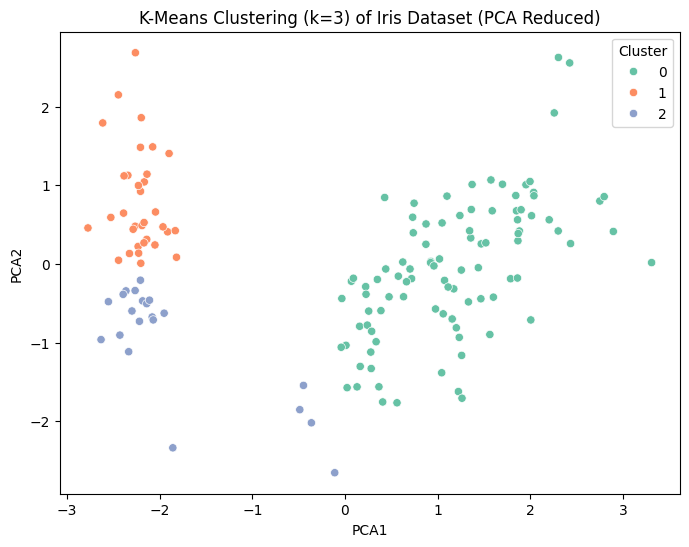

Silhouette Score for k=3: 0.48


In [1]:
# kmeans_lab.py
# Lab Exercise: K-Means Clustering on the Iris Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display dataset info
print("Iris Dataset Preview:")
print(iris.head())

# Select features for clustering
X = iris.drop('species', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Apply KMeans with k=3 (known from species classes)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
iris['Cluster'] = labels

# Visualize using PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
iris['PCA1'] = pca_components[:, 0]
iris['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("K-Means Clustering (k=3) of Iris Dataset (PCA Reduced)")
plt.show()

# Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for k=3: {score:.2f}")

# ==== STUDENT TASKS ====

# Task 1:
# Try clustering with k=2, 4, 5 and compare the PCA scatter plots and the Silhoutte coffeffients.
# Based on the outputs, what can you say about the best value of k?

# Task 2:
# Try clustering using only two features (e.g., petal_length, petal_width) and visualize.
# Based on the Sihoutte cofficient, what can you say about the effectiveness of the new set of features?


# Task 1

Iris Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


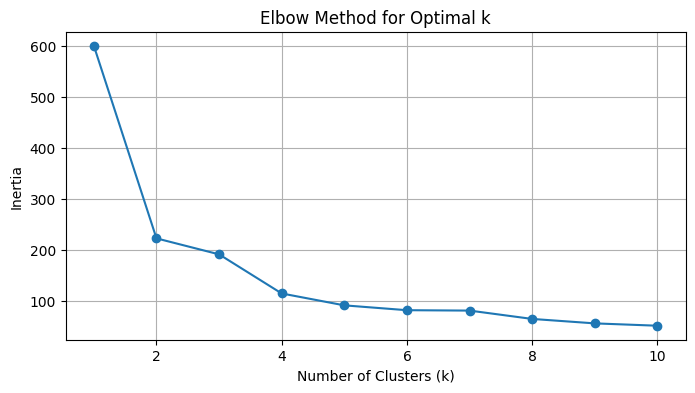

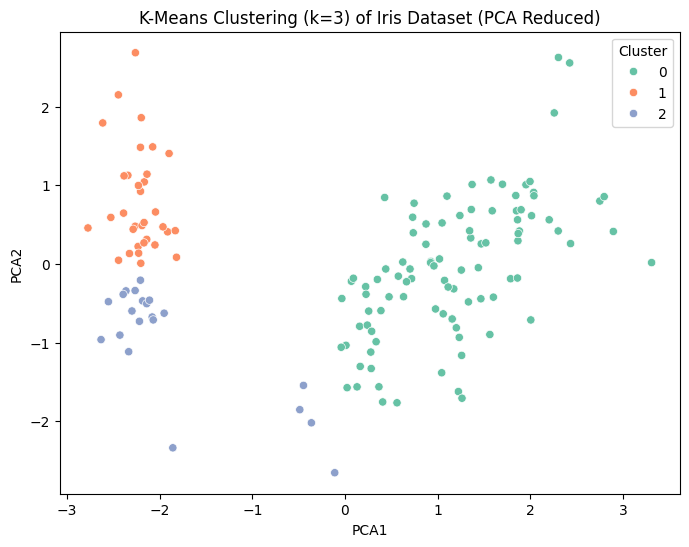

Silhouette Score for k=3: 0.48
Silhouette Score for k=2: 0.58


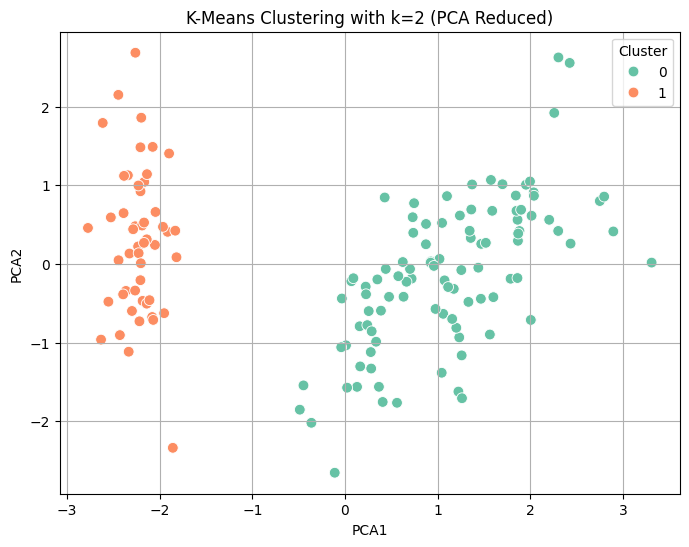

Silhouette Score for k=4: 0.39


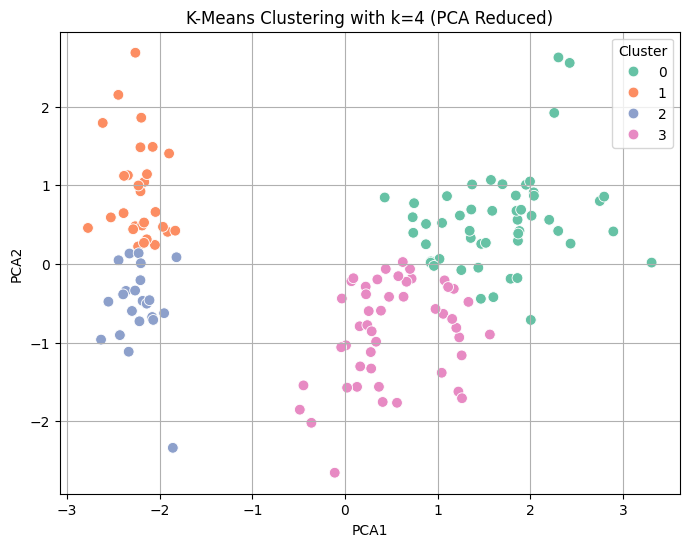

Silhouette Score for k=5: 0.35


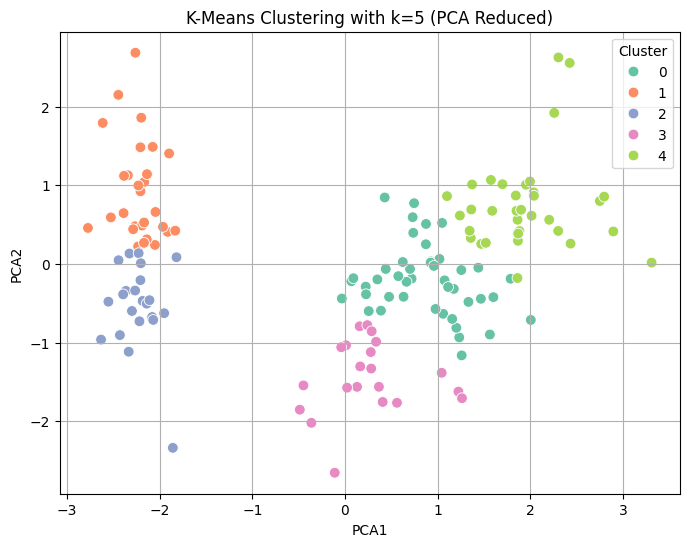

In [2]:
# kmeans_lab.py
# Lab Exercise: K-Means Clustering on the Iris Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display dataset info
print("Iris Dataset Preview:")
print(iris.head())

# Select features for clustering
X = iris.drop('species', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Apply KMeans with k=3 (known from species classes)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
iris['Cluster'] = labels

# Visualize using PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
iris['PCA1'] = pca_components[:, 0]
iris['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("K-Means Clustering (k=3) of Iris Dataset (PCA Reduced)")
plt.show()

# Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for k=3: {score:.2f}")

# ==== STUDENT TASKS ====

# Task 1:
# Try clustering with k=2, 4, 5 and compare the PCA scatter plots and the Silhoutte coffeffients.
# Based on the outputs, what can you say about the best value of k?

k_values = [2, 4, 5]

for k in k_values:
    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Evaluate Silhouette Score
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.2f}")

    # PCA Transformation (already fitted earlier)
    iris[f'Cluster_k{k}'] = labels

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=iris['PCA1'], y=iris['PCA2'],
        hue=labels, palette='Set2', s=60
    )
    plt.title(f'K-Means Clustering with k={k} (PCA Reduced)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()



# Task 2

Iris Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


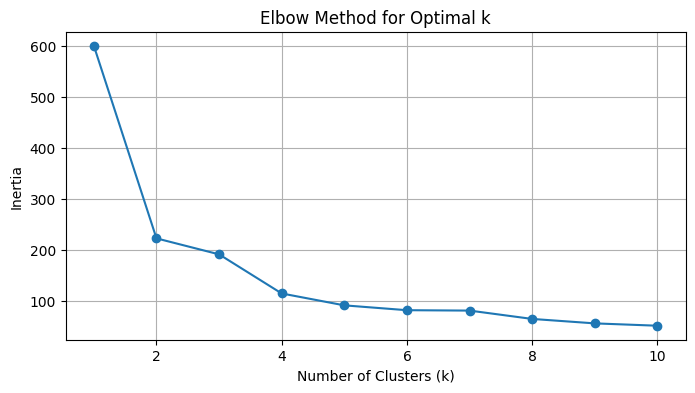

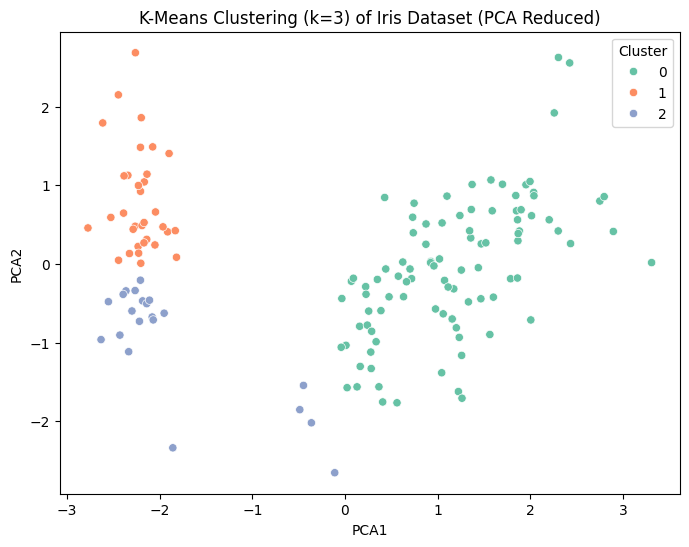

Silhouette Score for k=3: 0.48


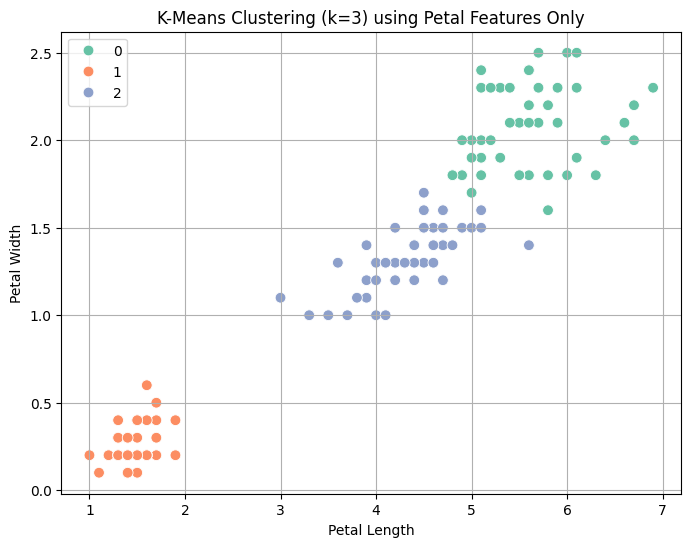

Silhouette Score using petal_length & petal_width: 0.67


In [3]:
# kmeans_lab.py
# Lab Exercise: K-Means Clustering on the Iris Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display dataset info
print("Iris Dataset Preview:")
print(iris.head())

# Select features for clustering
X = iris.drop('species', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Apply KMeans with k=3 (known from species classes)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
iris['Cluster'] = labels

# Visualize using PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
iris['PCA1'] = pca_components[:, 0]
iris['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("K-Means Clustering (k=3) of Iris Dataset (PCA Reduced)")
plt.show()

# Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for k=3: {score:.2f}")

# ==== STUDENT TASKS ====

# Task 2:
# Try clustering using only two features (e.g., petal_length, petal_width) and visualize.
# Based on the Sihoutte cofficient, what can you say about the effectiveness of the new set of features?

X_simple = iris[['petal_length', 'petal_width']]

# Standardize the features
scaler_simple = StandardScaler()
X_simple_scaled = scaler_simple.fit_transform(X_simple)

# KMeans with k=3
kmeans_simple = KMeans(n_clusters=3, random_state=42)
labels_simple = kmeans_simple.fit_predict(X_simple_scaled)

# Add cluster labels to the dataframe
iris['Cluster_2features'] = labels_simple

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=iris['petal_length'], y=iris['petal_width'],
    hue=labels_simple, palette='Set2', s=60
)
plt.title("K-Means Clustering (k=3) using Petal Features Only")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()

# Compute Silhouette Score
score_simple = silhouette_score(X_simple_scaled, labels_simple)
print(f"Silhouette Score using petal_length & petal_width: {score_simple:.2f}")

